In [2]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [3]:
using JLD2, CairoMakie, MAT

Precompiling CairoMakie
  ✓ CodecBzip2
  ✓ libsixel_jll
  ✓ Sixel
  ✓ PNGFiles
  ✓ ForwardDiff
  ✓ Adapt → AdaptStaticArraysExt
  ✓ ForwardDiff → ForwardDiffStaticArraysExt
  ✓ FiniteDiff → FiniteDiffStaticArraysExt
  ✓ StatsFuns → StatsFunsInverseFunctionsExt
  ✓ NLSolversBase
  ✓ LineSearches
  ✓ StatsFuns → StatsFunsChainRulesCoreExt
  ✓ Distributions
  ✓ Distributions → DistributionsTestExt
  ✓ Distributions → DistributionsChainRulesCoreExt
  ✓ SimpleRandom
  ✓ FFMPEG_jll
  ✓ KernelDensity
  ✓ MathOptInterface
  ✓ Optim
  ✓ SimpleGraphs
  ✓ DelaunayTriangulation
  ✓ Makie
  ✓ CairoMakie
  24 dependencies successfully precompiled in 210 seconds. 248 already precompiled.
  1 dependency had output during precompilation:
┌ KernelDensity
│  WARNING: method definition for checkbounds at /home/sergey/.julia/packages/Interpolations/USkTk/src/Interpolations.jl:454 declares type variable N but does not use it.
│  WARNING: method definition for checkbounds at /home/sergey/.julia/packages/Inte

In [4]:
cd("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/bifurcationkit")

sn_codim2_1 = load("sn_codim2_1.jld2")
sn_codim2_1I0 = sn_codim2_1["I0"]
sn_codim2_1U0 = sn_codim2_1["U0"];

In [5]:
cd("/home/sergey/MEGA/MatCont7p4/Systems/TM_reduce/diagram")

In [6]:
down_bottom_to_up = matopen("fp(down)_bottom_to_up.mat")
down_bottom_to_up = read(down_bottom_to_up, "x")

down_left_to_right = matopen("fp(down)_left_to_right.mat")
down_left_to_right = read(down_left_to_right, "x")

down_top_to_bottom = matopen("fp(down)_top_to_bottom.mat")
down_top_to_bottom = read(down_top_to_bottom, "x")

up_left_to_right = matopen("fp(up)_left_to_right.mat")
up_left_to_right = read(up_left_to_right, "x")

up_top_to_bottom = matopen("fp(up)_top_to_bottom.mat")
up_top_to_bottom = read(up_top_to_bottom, "x")

4×50 Matrix{Float64}:
 8.03387   8.02396   8.01107   7.99431   …  3.93197   3.83209   3.7322
 0.762934  0.763194  0.763532  0.763971     0.873041  0.875885  0.878747
 0.558669  0.559934  0.561576  0.563709     0.912135  0.91612   0.919939
 0.179     0.178896  0.178761  0.178587     0.157711  0.157628  0.157545

In [7]:
cd("/home/sergey/MEGA/dynamical-systems/Tsodyks Markram/images")

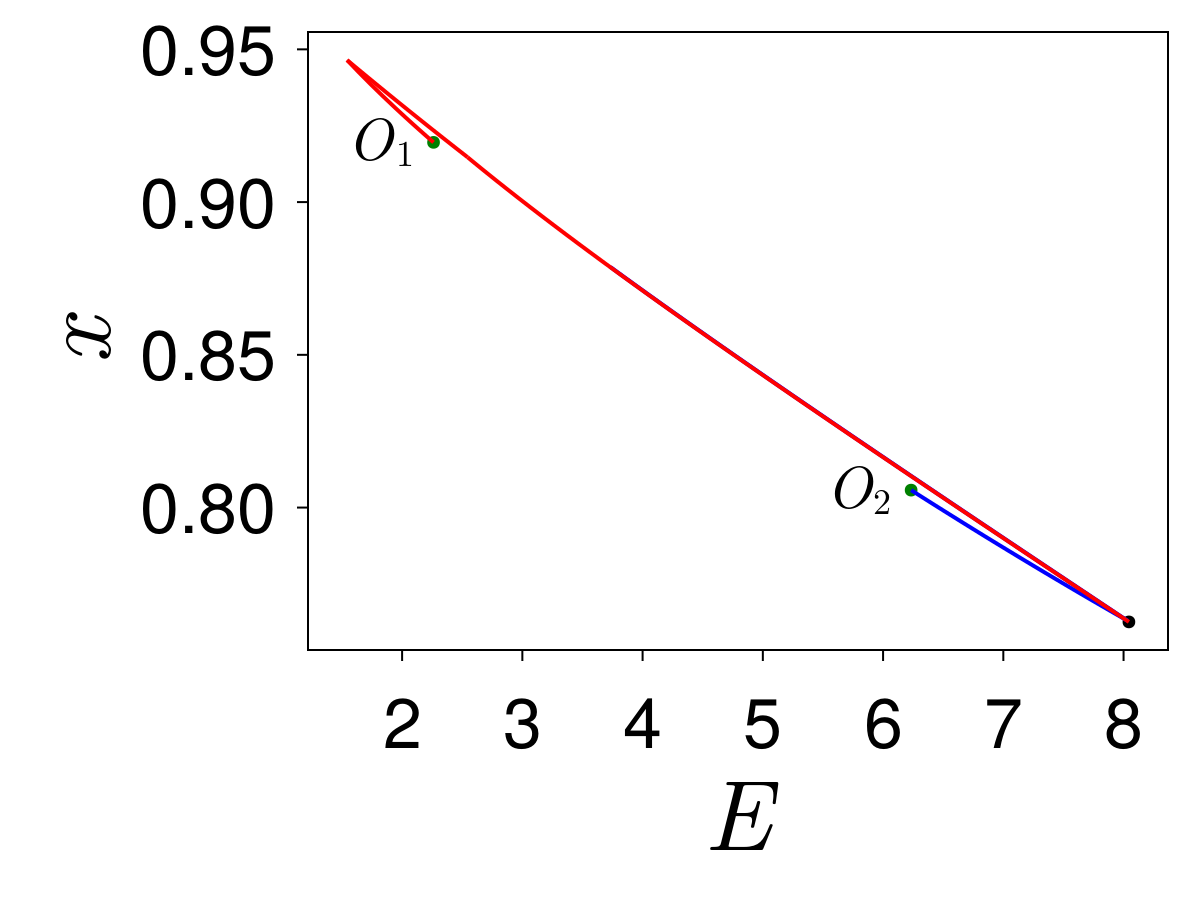

CairoMakie.Screen{SVG}


In [19]:
f = Figure()
ticksize = 35
tickpad = 10.0
textsize = 30
textsizecurve = 20
lw = 2.
mksize = 12

ax = Axis(f[1, 1], xlabel = L"E",ylabel = L"x", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

#--------------------------------------------------------------------------------------

scatter!(ax, down_top_to_bottom[1, 1], down_top_to_bottom[2, 1], color = :green)
text!(ax, down_top_to_bottom[1, 1], down_top_to_bottom[2, 1], text = L"O_1", fontsize = textsize, align = (:right, :center), offset = (-10, 0))
scatter!(ax, up_left_to_right[1, 1], up_left_to_right[2, 1], color = :green)
text!(ax, up_left_to_right[1, 1], up_left_to_right[2, 1], text = L"O_2", fontsize = textsize, align = (:right, :center), offset = (-10, 0))

scatter!(ax, down_bottom_to_up[1, end], down_bottom_to_up[2, end], color = :black)
#scatter!(ax, up_top_to_bottom[1, end], up_top_to_bottom[2, end], color = :black)

lines!(ax, up_left_to_right[1, :], up_left_to_right[2, :], color = :blue, linewidth = lw)
lines!(ax, up_top_to_bottom[1, :], up_top_to_bottom[2, :], color = :blue, linewidth = lw)

lines!(ax, down_bottom_to_up[1, :], down_bottom_to_up[2, :], color = :red, linewidth = lw)
lines!(ax, down_left_to_right[1, :], down_left_to_right[2, :], color = :red, linewidth = lw)
lines!(ax, down_top_to_bottom[1, :], down_top_to_bottom[2, :], color = :red, linewidth = lw)

display(f);
save("coordinates_fp.svg", f)

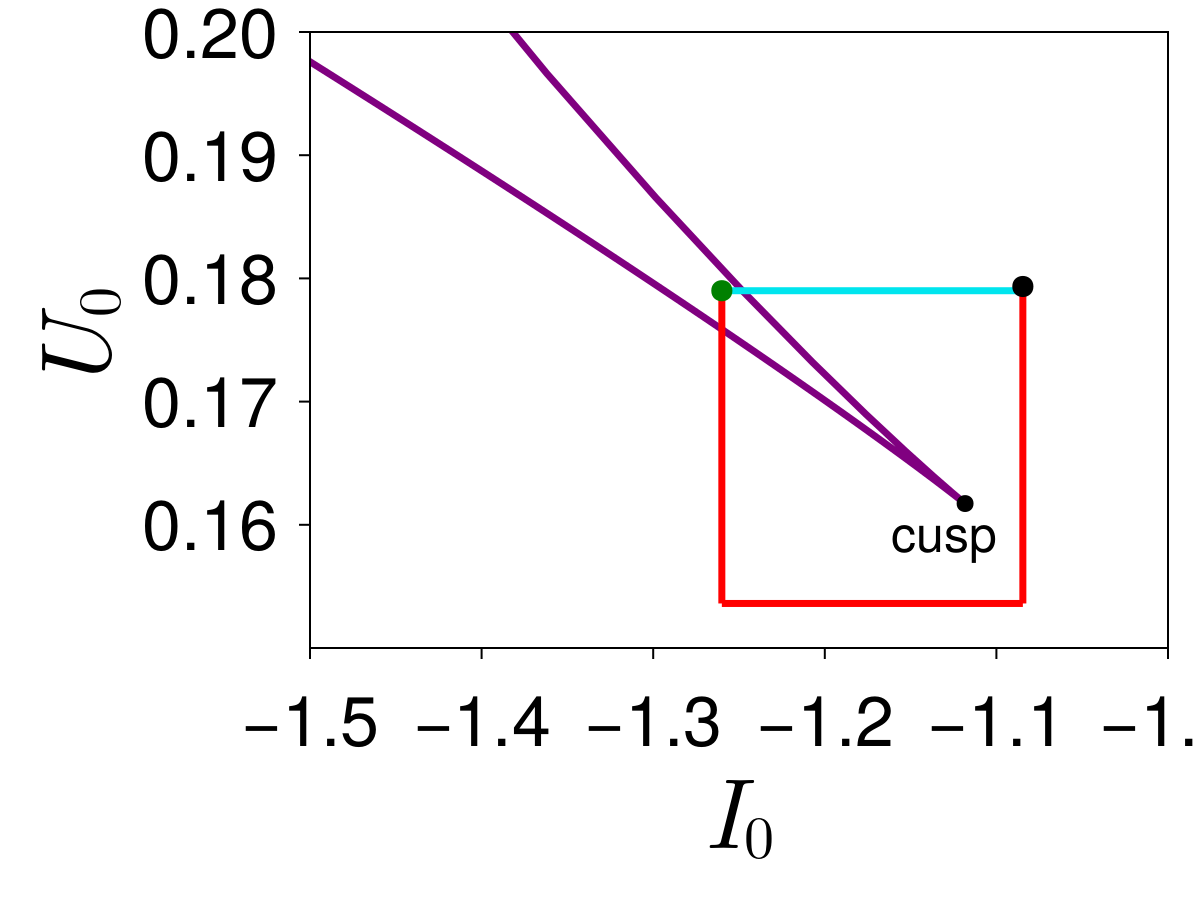

CairoMakie.Screen{SVG}


In [13]:
ticksize = 35
tickpad = 10.0
textsize = 25
textsizecurve = 30
lw = 3.5
mksize = 12

CairoMakie.activate!()
f = Figure()
ax = Axis(f[1, 1], xlabel = L"I_0",ylabel = L"U_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

lines!(ax, sn_codim2_1I0, sn_codim2_1U0, label = "Fold", linewidth = lw, color = :purple)
scatter!(ax, -1.1182463005483, 0.161724273501619, markersize = mksize, color = :black)
text!(ax, -1.1, 0.16, text = "cusp", fontsize = textsize, align = (:right, :top), offset = (0, 10))

lines!(ax, [minimum(up_left_to_right[4, :]), maximum(up_left_to_right[4, :])], [0.179, 0.179], color = "turquoise2", linewidth = lw )
#--------------------------------------------------------------------------------------------------------------------------------------------
lines!(ax, [-1.26, -1.26], [minimum(down_top_to_bottom[4, :]), maximum(down_top_to_bottom[4, :])], color = "red", linewidth = lw )
lines!(ax, [minimum(down_left_to_right[4, :]), maximum(down_left_to_right[4, :])], [0.153614947553101, 0.153614947553101], color = "red", linewidth = lw )
lines!(ax, [-1.08458272836874, -1.08458272836874], [minimum(down_bottom_to_up[4, :]), maximum(down_bottom_to_up[4, :])], color = "red", linewidth = lw )

scatter!(ax, up_left_to_right[4, 1], 0.179, color = :green, markersize = 15 )
scatter!(ax, -1.08458272836874, down_bottom_to_up[4, end], color = :black, markersize = 15 )

xlims!(-1.5, -1.0)
ylims!(0.15, 0.20)

display(f);

save("square.svg", f)